# Exemple de exerciții 

În acest laborator vom efectua o serie de exerciții pentru fundamentarea cunoștințelor de programare în limbajul Python și pregătirea examenului parțial.

Exercițiile se vor rezolva independent și rezolvarea finală va fi disponibilă în notebook.

## Exercițiul 1
Scrieți un script care să solicite introducerea de la tastatură a două numere, unul real **x** și un întreg **n** acesta din urmă fiind cuprins în intervalul (3,12).
Calculați suma folosind numerele de mai sus:

$$ \sum_{k=0}^n \frac{(-1)^k x^{2^k}}{2k!} $$

## Exercițiul 2
Scrieți un script care să preia de la tastatură un număr real **m** și un număr întreg **n**. Dacă m este inclus în intervalul $ [1.5 , 3.75] $ și $ n \ge 2 $ calculați termenii seriei:

$$ P(k,m) = \frac{e^{-m}*m^k}{k!} $$
și calculați suma lor 

$$ \sum_{k=0}^n P(k,m) $$

## Exercițiul 3

Scrieți un script care să preia de la tastatură 3 tupluri de câte 2 numere reale. Aceste tupluri vor fi convertite în 3 numere complexe X,Y respectiv Z. Să se calculeze și să se afișeze unghiurile în **grade** dintre X și Y, X și Z respectiv Y și Z.

### Indicație 
Folosiți link-ul pentru detalii despre funcțiile matematice pentru numere complexe.
https://docs.python.org/3/library/cmath.html

In [61]:
from cmath import phase
import numpy as np

def getTuple():
    lst = []
    while True:
        try:
            tmp = input("Introduce-ti tuplul")
            if "," in tmp:
                vals = tmp.split(",")
            else:
                vals = tmp.split(" ")
            if len(vals) > 2:
                print("Trebuie sa introduceti doua numere in fiecare tuplu")
            else:
                for i in vals:
                    lst.append(float(i))
                return tuple(lst)
        except Exception as e:
            print("Tuplul Dvs. trebuie sa contina numere reale")
            print(e)

def getComplexNo(tmp):
    return complex(tmp[0], tmp[1])

X = getComplexNo(getTuple())
Y = getComplexNo(getTuple())
Z = getComplexNo(getTuple())

pX = phase(X)
pY = phase(Y)
pZ = phase(Z)

dpX = np.degrees(pX)
dpY = np.degrees(pY)
dpZ = np.degrees(pZ)

print("Unghiul dintre X si Y este %.4f grade" % np.degrees(pX-pY))
print("Unghiul dintre X si Z este %.4f grade" % np.degrees(pX-pZ))
print("Unghiul dintre Y si Z este %.4f grade" % np.degrees(pY-pZ))


Introduce-ti tuplul 1.2, 2.3
Introduce-ti tuplul 1 1
Introduce-ti tuplul 2 2


Unghiul dintre X si Y este 17.4472 grade
Unghiul dintre X si Z este 17.4472 grade
Unghiul dintre Y si Z este 0.0000 grade


## Exercițiul 4
Scrieți un script care să preia de la tastatură un număr real z unde $ |z| < 1 $ și un număr întreg n. Verificați ca n să fie cuprins în intervalul \[5,15\] și implementați o funcție care să calculeze:
$$ \sum_{k=0}^n \frac{(2k)!*z^k}{2^{4k}*\sqrt 2 * (2k)!*(2k+1)!} $$
Verificați rezultatul obținut cu cel furnizat de funcția:
$$ \sqrt {\frac{1-\sqrt{1-z}}{z}} $$

## Exercițiul 5

Fie sirul definit prin relația de recurență $ a_n = atan(-3*a_{n-1}+10) $. Scrieți o secvență de cod care să preia de la tastatură termenul $ a_0 $ și verificați dacă numărul real este cuprins între 0 și π/2. Estimați limita acestui sir folosind pentru testul de atingere a limitei expresia

$ |a_n − a_{n−1}| < ε $

unde

$ ε = 10^{−7} $. Acesta din urmă poate fi scris atât în notația inginerească 1E-7 fie în notația standard, 0.0000001.

Afișați limita estimată și numărul iterației - n - atins în acel moment. Trasați grafic valorile obținute funcție de numărul de iterații.


a0: 1.1


Limita sirului este 1.4000562538 cu o precizie de 0.0000001000 dupa 7 iteratii


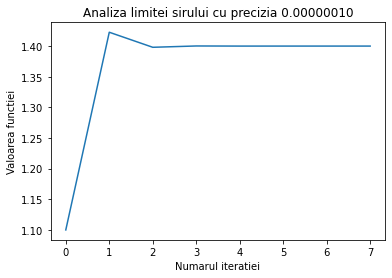

In [6]:
from math import atan, pi
from matplotlib import pyplot as plt

def myFn(an):
    return atan(-3*an+10)

def getA0():
    while True:
        try:
            a0 = float(input("a0:"))
            if a0 > 0 and a0 < pi/2:
                return a0
            print("Numarul introdus trebuie sa fie cuprins in intervalul (0,pi/2)")
        except Exception as e:
            print("Valoarea introdusa trebuie sa fie reala")

e = 1E-7
values = []

values.append(getA0())
while abs(myFn(values[-1])-values[-1]) > e:
       values.append(myFn(values[-1]))
print("Limita sirului este %.10f cu o precizie de %.10f dupa %i iteratii" % (values[-1], e, len(values)-1))

plt.figure()
plt.title("Analiza limitei sirului cu precizia %.8f" % e)
plt.xlabel("Numarul iteratiei")
plt.ylabel("Valoarea functiei")
plt.plot(range(len(values)), values)
plt.show()


## Exercițiul 6

Folosind formula pentru estimarea numarului e
$$ e = 3 + \sum_{k=2}^\inf \frac{-1}{k!(k-1)k}$$

creati un script care sa permita estimarea numarului e folosind aceasta formula si care sa foloseasca
testul de atingere a limitei folosind expresia

$$|math.e − e| < ε    (1) $$

, unde

$$ε = 10^{−6}$$

Afișați numărul de iterații pentru care criteriul de convergență (1) este atins.

In [27]:
from math import e, factorial
err = 1E-6
mye = 0
k = 2

while abs(e-mye) > err:
    tmp = 0
    for i in range(2,k):
        tmp += (-1)/(factorial(i)*(i-1)*i)
    mye = 3+tmp
    k += 1
    print(k, mye)
print("Am obtinut valoarea lui e %.14f cu o abatere de %.14f fata de valoarea nominala %.14f dupa %i iteratii" % (mye, err, e, k-1))


3 3
4 2.75
5 2.7222222222222223
6 2.71875
7 2.7183333333333333
8 2.718287037037037
9 2.71828231292517
Am obtinut valoarea lui e 2.71828231292517 cu o abatere de 0.00000100000000 fata de valoarea nominala 2.71828182845905 dupa 8 iteratii


## Exercițiul 7
Folosind formula

$$ \pi = \sqrt{12}*\sum_{k=0}^\inf \frac{(-3)^{-k}}{2k+1} $$

creati un script care sa permita estimarea numarului π folosind formula de mai sus si care sa
foloseasca testul de atingere a limitei

$ |pi − math.pi| < 10^{−6} $

Afișați numărul de iterații pentru care criteriul de convergență de mai sus este atins.

## Exercițiul 8


Scrieti un script care sa preia de la tastatura un numar real $ m > 0 $ si un numar intreg n. Verificati daca m este cuprins in intervalul (0.7, 3.5) si $ n >= 4 $. Calculati expresia:

$$ \frac{log_8 m}{(n-2)!^{n^{m-1}}} $$

### Indicație
Folosind **help(math.log)** observați că al 2-lea argument este baza logaritmului.

In [1]:
import math
help(math.log)

Help on built-in function log in module math:

log(...)
    log(x, [base=math.e])
    Return the logarithm of x to the given base.
    
    If the base not specified, returns the natural logarithm (base e) of x.



## Exercițiul 9
Scrieti un script care sa citeasca de la tastatura un numar real e care trebuie sa fie cuprins in
intervalul $ (0, 10^{−2}) $. Estimati radacinile functiei

$$ f(x) = atan(x) + x − 1 $$

in intervalul $x ∈ [0, 5]$ folosind testul de apropiere de radacina conditia $ |f(x)| < e $.

Afisati la consola numarul de pasi necesari pentru a atinge aceste aproximatii.

### Indicație
Este recomandată folosirea metodei de înjumătățire a intervalului (puteți binențeles pentru a asigura o convergență mai rapidă să folosiți și metoda coardei) prin definirea unei funcții ce identifică intervalul în care este amplasată rădăcina. 

```
F(a)*F(b) < 0
```

In [64]:
from math import atan

def myFn(x):
    return atan(x) + x - 1

def hasRoot(a,b):
    return myFn(a)*myFn(b) < 0

def getEps():
    while True:
        try:
            eps = float(input("Introduceti precizie permisa"))
            if eps > 0 and eps < 0.01:
                return eps
            print("Precizia trebuie sa fie cuprinsa in intervalul (0,0.01)")
        except Exception as e:
            print("Precizia trebuie sa fie un numar real")
            print(e)

a = 0
b = 5

eps = getEps()

if not hasRoot(a,b):
    print("In intervalul nostru nu avem o radacina")
else:
    while abs(a-b) > eps:
        c = (a+b)/2
        if hasRoot(a, c):
            b = c
        else:
            a = c
    rad = (a+b)/2
    print("Radacina noastra a fost estimata la %.14f cu o precizie de %.14f" % (rad, eps))

Introduceti precizie permisa 0.000000001


Radacina noastra a fost estimata la 0.52026899269549 cu o precizie de 0.00000000100000


## Exercițiul 10

Scriteti un script care sa citeasca un fisier text ce contine 2 coloane despartite cu spatiu si contin
cate un numar real in fiecare coloana. Pentru fiecare linie din fisierul respectiv se va afisa numarul
complex z cu $ Re(z) = a $ si $ Im(z)=b $. Stiind ca numarul $ c = 1-1j$ verificati conditia ca $ | c-z
| <= 3 $.

### Indicație 
Folosiți link-ul pentru detalii despre funcțiile matematice pentru numere complexe.
https://docs.python.org/3/library/cmath.html

In [54]:
# Pentru a genera fisierul de date folosiți acest cod:
from random import uniform as rand
with open("test.dat", "w") as f:
    for i in range(1000):
        f.write("%f %f\n" % (rand(1,9), rand(1,4))) 

In [55]:
from math import sqrt
c = complex(1,-1)
def getMagnitude(c):
    return sqrt(c.real**2+c.imag**2)

with open("test.dat", "r") as f:
    for line in f.readlines():
        sp = line.split(" ")
        pr = sp[0]
        pi = sp[1]
        z = complex(float(sp[0]), float(sp[1]))
        tmp = c-z
        if getMagnitude(tmp) <= 3:
            print(z)

(1.269316+1.437764j)
(2.27049+1.097486j)
(2.249867+1.145174j)
(2.802596+1.132229j)
(2.826999+1.260923j)
(2.747286+1.3j)
(2.426878+1.111204j)
(2.188251+1.748815j)
(2.614454+1.214132j)
(1.479438+1.115667j)
(1.976442+1.128185j)
(1.091564+1.724992j)
(1.161934+1.108906j)
(2.235468+1.140867j)
(2.274054+1.155678j)
(2.175346+1.163275j)
(1.331053+1.969274j)
(2.68462+1.278901j)
(1.225479+1.847354j)
(1.344928+1.516138j)
(2.292669+1.153722j)
(1.165204+1.330002j)
(2.27845+1.183459j)
(2.173933+1.109737j)
(1.618782+1.357826j)
(2.82875+1.245425j)
(1.780815+1.323342j)
(2.594228+1.354037j)
(2.440486+1.088188j)
(1.984014+1.450152j)
(1.385852+1.485492j)
(2.447768+1.490884j)
(1.478217+1.316579j)
(1.075377+1.611246j)
(2.022341+1.273981j)
(1.169396+1.412826j)
(2.258797+1.120851j)
(1.676972+1.248089j)
(2.95103+1.008179j)
(1.885964+1.537198j)
(1.279372+1.886851j)
(2.258532+1.39384j)
(1.939528+1.292835j)
(1.089106+1.641418j)
(1.981301+1.424867j)
(1.685147+1.534882j)
(2.246389+1.489704j)
(1.776476+1.573994j)
(1.

## Indicație Generală

Pentru rezolvările ce folosesc Jupyter Notebook se va implementa câte un script în fiecare celulă permitând astfel vizualizarea întregului cod. În cazul în care sunt folosite variabile comune între celule diferite atunci este obligatorie resetarea valorii pentru acestea în fiecare celulă astfel încât rularea unei probleme să nu interfereze cu rularea celulelor următoare.